In [4]:
!pip install mne
import os
from glob import glob
import numpy as np
import pandas as pd
import mne
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.2 MB/s eta 0:00:00


In [5]:
# !conda install -y gdown
# !gdown --id 1VK-fEgZ_lMLmBXpyM0vXWLsawbK9uhBx
# !gdown --id 1SpTGCXThIQXZJjB0XXIICKJl-joKi2ct
# !gdown --id 1-523ebE1L50tcgn08Enl-ggQ8MYjhWPO

In [7]:
data=r'/content/drive/MyDrive/eeg-data-row/session1_sub11_reaching_realMove.vhdr'
raw = mne.io.read_raw_brainvision(data, preload=True)

Extracting parameters from /content/drive/MyDrive/eeg-data-row/session1_sub11_reaching_realMove.vhdr...
Setting channel info structure...
Reading 0 ... 8488199  =      0.000 ...  3395.280 secs...


In [9]:
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage, on_missing='ignore')


# Create info object
info = raw.info

# Create layout
layout = mne.channels.find_layout(info, ch_type='eeg', exclude=['hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D', 'EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref'])


# Create epochs
events, _ = mne.events_from_annotations(raw)

epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, preload=True, event_repeated='merge')

# Select channels and create layout
picks = mne.pick_channels(epochs.ch_names, ['Fz', 'Cz', 'Pz', 'Oz'])




# Select channels and create layout
picks = mne.pick_types(raw.info, meg=False, eeg=True)
ch_names = [raw.info['ch_names'][i] for i in picks]
pos = mne.channels.layout._auto_topomap_coords(info, picks, ignore_overlap=True, to_sphere=True, sphere=None)
layout = mne.channels.layout.Layout(
    pos=pos, names=ch_names, box=(None, None), ids=picks, kind='custom')

Used Annotations descriptions: ['Comment/actiCAP Active Shield On', 'Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']
Not setting metadata
905 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 905 events and 1751 original time points ...
2 bad epochs dropped


Pre_Processing

In [10]:
freq_low = 8 # μ band
freq_high = 32 # β band

raw.filter(l_freq=freq_low, h_freq=freq_high, method='iir', iir_params=dict(order=4, ftype='butter', output='sos'), phase='zero-double')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 32 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 32.00 Hz: -6.02, -6.02 dB



<RawBrainVision | session1_sub11_reaching_realMove.eeg, 71 x 8488200 (3395.3 s), ~4.49 GB, data loaded>

Using matplotlib as 2D backend.


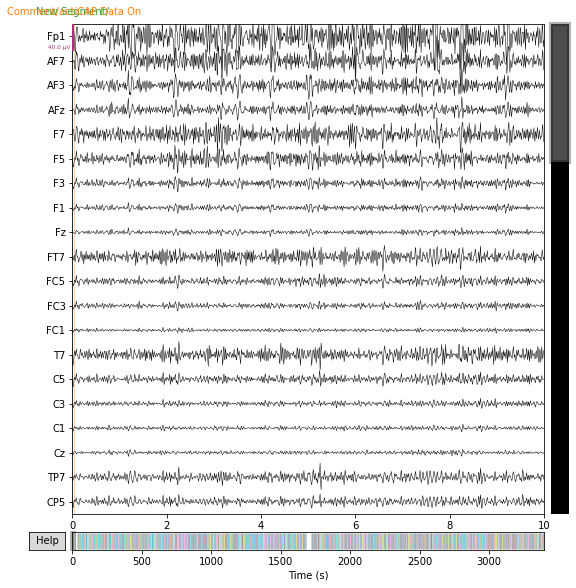

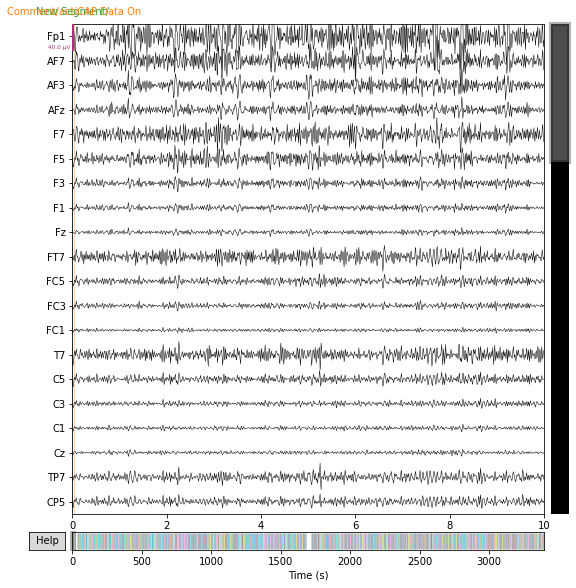

In [11]:
raw.plot()

In [12]:
selected=['AF7','AF3','AFz','F7','F5','F3','F1','Fz','FC5','FC3','FC1','FCz','T7','C5','C3','C1','Cz']#
# selected=['T7','C5','C3','C1','Cz']
raw = raw.pick_channels(selected)

In [13]:
raw

<RawBrainVision | session1_sub11_reaching_realMove.eeg, 16 x 8488200 (3395.3 s), ~1.01 GB, data loaded>

In [14]:
# # ica = mne.preprocessing.ICA(method='fastica') 

# ica = mne.preprocessing.ICA(method='infomax', max_iter=1000) # to Use parallel processing 

# ica.fit(raw)

# with open('ica.pickle', 'rb') as f:
#      ica = pickle.load(f)


In [16]:
import pickle

# with open('ica_o.pickle', 'wb') as f:
#     pickle.dump(ica, f)

with open('/content/ica_o.pickle', 'rb') as f:
     ica = pickle.load(f)

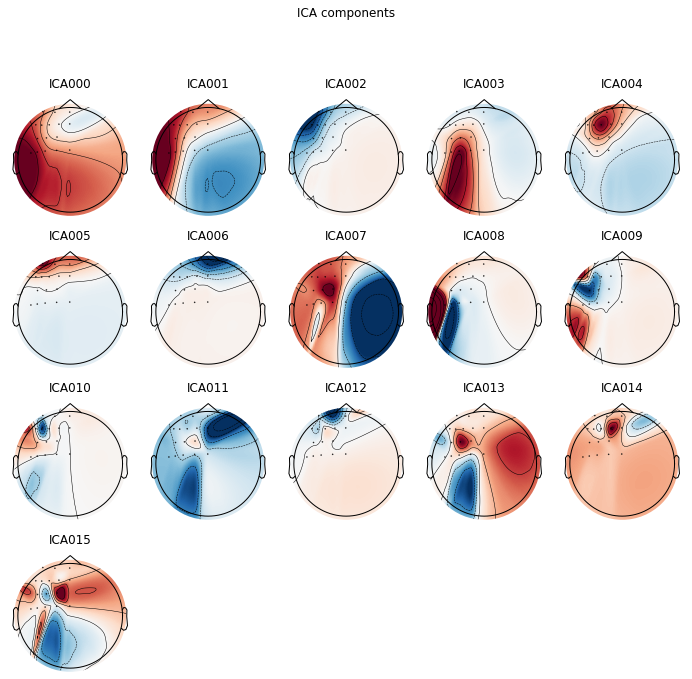

[<MNEFigure size 702x696.24 with 16 Axes>]

In [17]:
ica.plot_components()

In [18]:
ica

Method,infomax
Fit,1000 iterations on raw data (9804300 samples)
ICA components,16
Available PCA components,16
Channel types,eeg
ICA components marked for exclusion,—


In [19]:
ica.exclude = [0, 1, 2]

# Apply the selected ICs to the data
raw_corrected = raw.copy()
ica.apply(raw_corrected)


Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 3 ICA components
    Projecting back using 16 PCA components


<RawBrainVision | session1_sub11_reaching_realMove.eeg, 16 x 8488200 (3395.3 s), ~1.01 GB, data loaded>

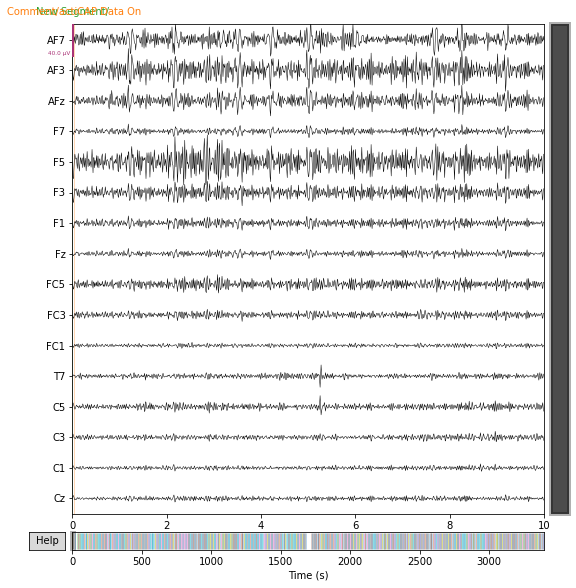

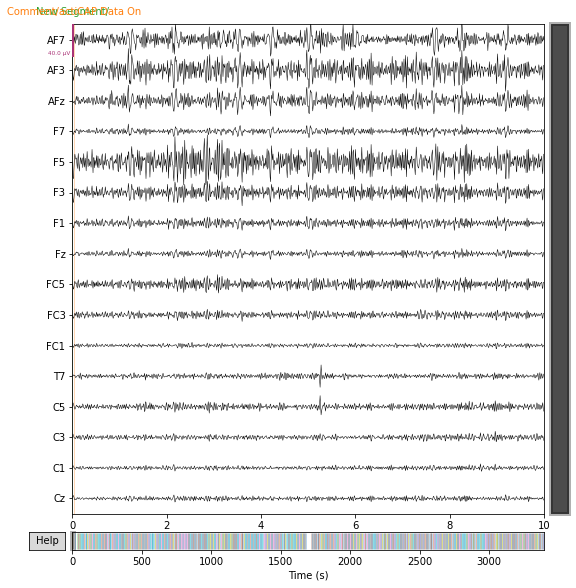

In [20]:
raw_corrected.plot()

In [21]:
row = raw_corrected.copy()

In [22]:
ch=raw.ch_names

In [23]:
len(ch)

16

In [24]:
ch

['AF7',
 'AF3',
 'AFz',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'FC5',
 'FC3',
 'FC1',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz']

######     1-1. Arm reaching

         class       Forward   Backward    Left    Right    Up    Down   Rest
   --------------  ---------   ----------  ------  -------  ------  ------  ------
    trigger code     S 11        S 21      S 31    S 41    S 51   S 61     S 8

In [26]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['Comment/actiCAP Active Shield On', 'Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']


In [27]:
events[1]

{'Comment/actiCAP Active Shield On': 10001,
 'Comment/actiCAP Data On': 10002,
 'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  4': 4,
 'Stimulus/S  5': 5,
 'Stimulus/S  6': 6,
 'Stimulus/S  8': 8,
 'Stimulus/S 11': 11,
 'Stimulus/S 13': 13,
 'Stimulus/S 14': 14,
 'Stimulus/S 21': 21,
 'Stimulus/S 31': 31,
 'Stimulus/S 41': 41,
 'Stimulus/S 51': 51,
 'Stimulus/S 61': 61}

In [28]:
event_dict={
 'Forward': 11,
 'Backward ': 21,
 'Left': 31,
 'Right': 41,
 'UP': 51,
 'Down': 61,
 'Rest': 8,
}

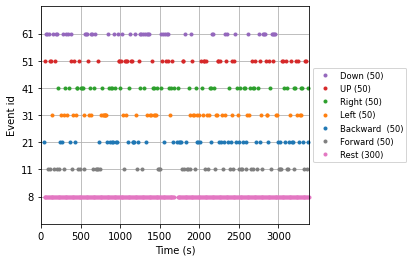

In [29]:
fig=mne.viz.plot_events(events[0][:],event_id=event_dict,sfreq=raw.info['sfreq'],
                       first_samp=raw.first_samp)

In [30]:
#  'Forward': 11,
#  'Backward ': 21,
#  'Left': 31,
#  'Right': 41,
#  'UP': 51,
#  'Down': 61,
#  'Rest': 8,
epoch=mne.Epochs(raw,events[0],event_id=[11,21,31,41,51,61,8],tmin=-0.1,tmax=0.7)

Not setting metadata
600 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [31]:
epoch.get_data().shape

Using data from preloaded Raw for 600 events and 2001 original time points ...
0 bad epochs dropped


(600, 16, 2001)

In [32]:
labels=epoch.events[:,-1]

In [33]:
labels

array([21,  8, 51,  8, 61,  8, 61,  8, 11,  8, 61,  8, 51,  8, 11,  8, 51,
        8, 31,  8, 61,  8, 11,  8, 51,  8, 61,  8, 61,  8, 11,  8, 41,  8,
       11,  8, 21,  8, 31,  8, 21,  8, 61,  8, 11,  8, 31,  8, 41,  8, 61,
        8, 31,  8, 61,  8, 41,  8, 21,  8, 61,  8, 51,  8, 11,  8, 31,  8,
       51,  8, 21,  8, 31,  8, 41,  8, 41,  8, 11,  8, 51,  8, 11,  8, 41,
        8, 41,  8, 41,  8, 11,  8, 31,  8, 61,  8, 61,  8, 61,  8, 51,  8,
       31,  8, 41,  8, 61,  8, 31,  8, 61,  8, 11,  8, 41,  8, 61,  8, 11,
        8, 11,  8, 11,  8, 51,  8, 21,  8, 11,  8, 31,  8, 41,  8, 31,  8,
       31,  8, 31,  8, 31,  8, 31,  8, 21,  8, 61,  8, 41,  8, 21,  8, 41,
        8, 41,  8, 21,  8, 21,  8, 61,  8, 41,  8, 21,  8, 21,  8, 61,  8,
       51,  8, 51,  8, 41,  8, 51,  8, 61,  8, 31,  8, 11,  8, 51,  8, 31,
        8, 51,  8, 51,  8, 21,  8, 41,  8, 61,  8, 51,  8, 51,  8, 21,  8,
       21,  8, 21,  8, 61,  8, 31,  8, 11,  8, 21,  8, 51,  8, 61,  8, 41,
        8, 61,  8, 11,  8

In [34]:
evoked_1=epoch['11'].average()
evoked_2=epoch['21'].average()
evoked_3=epoch['31'].average()
evoked_4=epoch['41'].average()
evoked_5=epoch['51'].average()
evoked_6=epoch['61'].average()
evoked_7=epoch['8'].average()

In [35]:
dicts={
#  'Forward': evoked_1,
#  'Backward': evoked_2,
 'Left': evoked_3,
 'Right': evoked_4,
#  'UP': evoked_5,
#  'Down': evoked_6,
#  'Rest': evoked_7,
       }

combining channels using "gfp"
combining channels using "gfp"


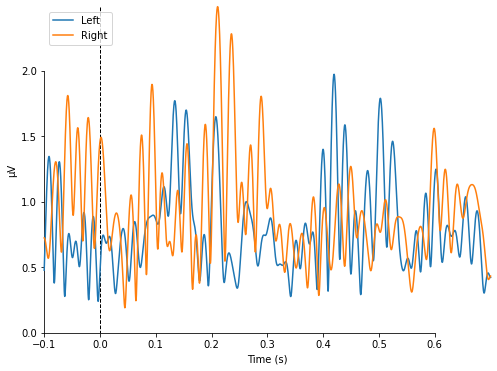

[<Figure size 576x432 with 1 Axes>]

In [36]:
mne.viz.plot_compare_evokeds(dicts)

combining channels using "gfp"
combining channels using "gfp"


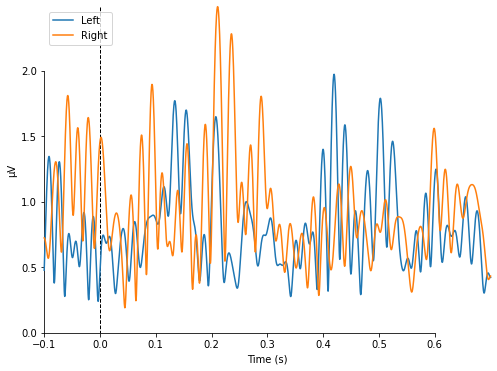

[<Figure size 576x432 with 1 Axes>]

In [37]:
mne.viz.plot_compare_evokeds(dicts)

In [38]:
labels.shape

(600,)

In [39]:
epoch.get_data().shape

Using data from preloaded Raw for 600 events and 2001 original time points ...


(600, 16, 2001)

In [1]:
%%capture
!pip install mne
import os
from glob import glob
import numpy as np
import pandas as pd
import mne
import warnings
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=r'/content/drive/MyDrive/eeg-data-row/session1_sub11_reaching_realMove.vhdr'
file_paths=[data]

In [4]:
def read_data(path):
    data=path
    raw = mne.io.read_raw_brainvision(data, preload=True)
    #raw.drop_channels(['eog-r', 'eog-m', 'eog-l'])
    #raw.pick_channels(selected)
    raw.pick_types(eeg=True)
    raw.set_eeg_reference()
    #raw.resample(sfreq=256)
    #raw.filter(l_freq=0,h_freq=30)
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[11,21,31,41,51,61],tmin=-0.1,tmax=0.7)
    labels=epoch.events[:,-1]
    features=epoch.get_data()
    return features

In [5]:
def read_data_label(path):
    data=path
    raw = mne.io.read_raw_brainvision(data, preload=True)
    #raw.drop_channels(['eog-r', 'eog-m', 'eog-l'])
    #raw.pick_channels(selected)
    raw.pick_types(eeg=True)
    raw.set_eeg_reference()
    #raw.resample(sfreq=256)
    #raw.filter(l_freq=0,h_freq=30)
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[11,21,31,41,51,61],tmin=-0.1,tmax=0.7)
    labels=epoch.events[:,-1]
    features=epoch.get_data()
    return labels

In [6]:
def reshape_data (data_epochs):
  # add depth 1 to the data 
  data_epochs= np.reshape(data_epochs,(data_epochs.shape[0],data_epochs.shape[1],data_epochs.shape[2],1))
  print (data_epochs.shape)
  final_array=np.vstack(data_array)
  print(data_epochs.shape)
  '''data_epochs=np.moveaxis(data_epochs,1,2)
  #data_epochs.shape'''
  return data_epochs

# so lets read all data


In [7]:
selected=['AF7','AF3','AFz','F7','F5','F3','F1','Fz','FC5','FC3','FC1','FCz','T7','C5','C3','C1','Cz']
data_array=[read_data(i) for i in file_paths]
label_array=[read_data_label(i) for i in file_paths]

Extracting parameters from /content/drive/MyDrive/eeg-data-row/session1_sub11_reaching_realMove.vhdr...
Setting channel info structure...
Reading 0 ... 8488199  =      0.000 ...  3395.280 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['Comment/actiCAP Active Shield On', 'Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']
Not setting metadata
300 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 300 events and 2001 original time points ...
0 bad epochs dropped
Extracting parameters from /content/drive/MyDrive/eeg-data-row/s

In [8]:
%%capture 
!pip install PyRiemann>=0.2.5
!pip install scikit-learn>=0.20.1
!pip install matplotlib>=2.2.3
!pip install tensorflow==2.3

In [9]:
#reshape data 
data_epochs = reshape_data(data_array[0])
labels=np.hstack(label_array)

#split data 
X_train, X_test, y_train, y_test=train_test_split(data_epochs,labels,test_size = 0.1,stratify=labels,shuffle=True)#,stratify=final_label,shuffle=True
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(pd.DataFrame(y_test).value_counts())

# map events to 0-6 
d={11:0,21:1,31:2,41:3,51:4,61:5,8:6}
df=pd.DataFrame(y_train)
df=df.replace(d)
y_train=tf.keras.utils.to_categorical(df)#
df=pd.DataFrame(y_test)
df=df.replace(d)
y_test=tf.keras.utils.to_categorical(df)#

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train.reshape(-1,X_train.shape[-1])).reshape(X_train.shape)
X_test=scaler.transform(X_test.reshape(-1,X_test.shape[-1])).reshape(X_test.shape)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(300, 71, 2001, 1)
(300, 71, 2001, 1)
(270, 71, 2001, 1) (30, 71, 2001, 1) (270,) (30,)
11    5
21    5
31    5
41    5
51    5
61    5
dtype: int64
(270, 71, 2001, 1) (30, 71, 2001, 1) (270, 6) (30, 6)


In [10]:
"""
 ARL_EEGModels - A collection of Convolutional Neural Network models for EEG
 Signal Processing and Classification, using Keras and Tensorflow
 Requirements:
    (1) tensorflow == 2.X (as of this writing, 2.0 - 2.3 have been verified
        as working)
 
 To run the EEG/MEG ERP classification sample script, you will also need
    (4) mne >= 0.17.1
    (5) PyRiemann >= 0.2.5
    (6) scikit-learn >= 0.20.1
    (7) matplotlib >= 2.2.3
    
 To use:
    
    (1) Place this file in the PYTHONPATH variable in your IDE (i.e.: Spyder)
    (2) Import the model as
        
        from EEGModels import EEGNet    
        
        model = EEGNet(nb_classes = ..., Chans = ..., Samples = ...)
        
    (3) Then compile and fit the model
    
        model.compile(loss = ..., optimizer = ..., metrics = ...)
        fitted    = model.fit(...)
        predicted = model.predict(...)
 Portions of this project are works of the United States Government and are not
 subject to domestic copyright protection under 17 USC Sec. 105.  Those 
 portions are released world-wide under the terms of the Creative Commons Zero 
 1.0 (CC0) license.  
 
 Other portions of this project are subject to domestic copyright protection 
 under 17 USC Sec. 105.  Those portions are licensed under the Apache 2.0 
 license.  The complete text of the license governing this material is in 
 the file labeled LICENSE.TXT that is a part of this project's official 
 distribution. 
"""

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K


def EEGNet(nb_classes, Chans = 64, Samples = 128, 
             dropoutRate = 0.5, kernLength = 64, F1 = 8, 
              D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout'):
    """ Keras Implementation of EEGNet
    http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta
    Note that this implements the newest version of EEGNet and NOT the earlier
    version (version v1 and v2 on arxiv). We strongly recommend using this
    architecture as it performs much better and has nicer properties than
    our earlier version. For example:
        
        1. Depthwise Convolutions to learn spatial filters within a 
        temporal convolution. The use of the depth_multiplier option maps 
        exactly to the number of spatial filters learned within a temporal
        filter. This matches the setup of algorithms like FBCSP which learn 
        spatial filters within each filter in a filter-bank. This also limits 
        the number of free parameters to fit when compared to a fully-connected
        convolution. 
        
        2. Separable Convolutions to learn how to optimally combine spatial
        filters across temporal bands. Separable Convolutions are Depthwise
        Convolutions followed by (1x1) Pointwise Convolutions. 
        
    
    While the original paper used Dropout, we found that SpatialDropout2D 
    sometimes produced slightly better results for classification of ERP 
    signals. However, SpatialDropout2D significantly reduced performance 
    on the Oscillatory dataset (SMR, BCI-IV Dataset 2A). We recommend using
    the default Dropout in most cases.
        
    Assumes the input signal is sampled at 128Hz. If you want to use this model
    for any other sampling rate you will need to modify the lengths of temporal
    kernels and average pooling size in blocks 1 and 2 as needed (double the 
    kernel lengths for double the sampling rate, etc). Note that we haven't 
    tested the model performance with this rule so this may not work well. 
    
    The model with default parameters gives the EEGNet-8,2 model as discussed
    in the paper. This model should do pretty well in general, although it is
  	advised to do some model searching to get optimal performance on your
  	particular dataset.
    We set F2 = F1 * D (number of input filters = number of output filters) for
    the SeparableConv2D layer. We haven't extensively tested other values of this
    parameter (say, F2 < F1 * D for compressed learning, and F2 > F1 * D for
    overcomplete). We believe the main parameters to focus on are F1 and D. 
    Inputs:
        
      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer. We found
                        that setting this to be half the sampling rate worked
                        well in practice. For the SMR dataset in particular
                        since the data was high-passed at 4Hz we used a kernel
                        length of 32.     
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. Default: F1 = 8, F2 = F1 * D. 
      D               : number of spatial filters to learn within each temporal
                        convolution. Default: D = 2
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.

    """
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    
    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False, 
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)
    
    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)
        
    flatten      = Flatten(name = 'flatten')(block2)
    
    dense        = Dense(nb_classes, name = 'dense', 
                         kernel_constraint = max_norm(norm_rate))(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input1, outputs=softmax)




def EEGNet_SSVEP(nb_classes =12, Chans =8 , Samples =256,
             dropoutRate = 0.5, kernLength = 256, F1 = 96, 
             D = 1, F2 = 96, dropoutType = 'Dropout'):
    """ SSVEP Variant of EEGNet, as used in [1]. 
    Inputs:
        
      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. 
      D               : number of spatial filters to learn within each temporal
                        convolution.
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.
      
      
    [1]. Waytowich, N. et. al. (2018). Compact Convolutional Neural Networks
    for Classification of Asynchronous Steady-State Visual Evoked Potentials.
    Journal of Neural Engineering vol. 15(6). 
    http://iopscience.iop.org/article/10.1088/1741-2552/aae5d8
    """
    
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    
    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False, 
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)
    
    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)
        
    flatten      = Flatten(name = 'flatten')(block2)
    
    dense        = Dense(nb_classes, name = 'dense')(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input1, outputs=softmax)



def EEGNet_old(nb_classes, Chans = 64, Samples = 128, regRate = 0.0001,
           dropoutRate = 0.25, kernels = [(2, 32), (8, 4)], strides = (2, 4)):
    """ Keras Implementation of EEGNet_v1 (https://arxiv.org/abs/1611.08024v2)
    This model is the original EEGNet model proposed on arxiv
            https://arxiv.org/abs/1611.08024v2
    
    with a few modifications: we use striding instead of max-pooling as this 
    helped slightly in classification performance while also providing a 
    computational speed-up. 
    
    Note that we no longer recommend the use of this architecture, as the new
    version of EEGNet performs much better overall and has nicer properties.
    
    Inputs:
        
        nb_classes     : total number of final categories
        Chans, Samples : number of EEG channels and samples, respectively
        regRate        : regularization rate for L1 and L2 regularizations
        dropoutRate    : dropout fraction
        kernels        : the 2nd and 3rd layer kernel dimensions (default is 
                         the [2, 32] x [8, 4] configuration)
        strides        : the stride size (note that this replaces the max-pool
                         used in the original paper)
    
    """

    # start the model
    input_main   = Input((Chans, Samples))
    layer1       = Conv2D(16, (Chans, 1), input_shape=(Chans, Samples, 1),
                                 kernel_regularizer = l1_l2(l1=regRate, l2=regRate))(input_main)
    layer1       = BatchNormalization()(layer1)
    layer1       = Activation('elu')(layer1)
    layer1       = Dropout(dropoutRate)(layer1)
    
    permute_dims = 2, 1, 3
    permute1     = Permute(permute_dims)(layer1)
    
    layer2       = Conv2D(4, kernels[0], padding = 'same', 
                            kernel_regularizer=l1_l2(l1=0.0, l2=regRate),
                            strides = strides)(permute1)
    layer2       = BatchNormalization()(layer2)
    layer2       = Activation('elu')(layer2)
    layer2       = Dropout(dropoutRate)(layer2)
    
    layer3       = Conv2D(4, kernels[1], padding = 'same',
                            kernel_regularizer=l1_l2(l1=0.0, l2=regRate),
                            strides = strides)(layer2)
    layer3       = BatchNormalization()(layer3)
    layer3       = Activation('elu')(layer3)
    layer3       = Dropout(dropoutRate)(layer3)
    
    flatten      = Flatten(name = 'flatten')(layer3)
    
    dense        = Dense(nb_classes, name = 'dense')(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)



def DeepConvNet(nb_classes, Chans = 64, Samples = 256,
                dropoutRate = 0.5):
    """ Keras implementation of the Deep Convolutional Network as described in
    Schirrmeister et. al. (2017), Human Brain Mapping.
    
    This implementation assumes the input is a 2-second EEG signal sampled at 
    128Hz, as opposed to signals sampled at 250Hz as described in the original
    paper. We also perform temporal convolutions of length (1, 5) as opposed
    to (1, 10) due to this sampling rate difference. 
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                      ours        original paper
    pool_size        1, 2        1, 3
    strides          1, 2        1, 3
    conv filters     1, 5        1, 10
    
    Note that this implementation has not been verified by the original 
    authors. 
    
    """

    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(25, (1, 5), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(25, (Chans, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation('elu')(block1)
    block1       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block1)
    block1       = Dropout(dropoutRate)(block1)
  
    block2       = Conv2D(50, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block2       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block2)
    block2       = Activation('elu')(block2)
    block2       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block2)
    block2       = Dropout(dropoutRate)(block2)
    
    block3       = Conv2D(100, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block2)
    block3       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block3)
    block3       = Activation('elu')(block3)
    block3       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block3)
    block3       = Dropout(dropoutRate)(block3)
    
    block4       = Conv2D(200, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block3)
    block4       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block4)
    block4       = Activation('elu')(block4)
    block4       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block4)
    block4       = Dropout(dropoutRate)(block4)
    
    flatten      = Flatten()(block4)
    
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)


# need these for ShallowConvNet
def square(x):
    return K.square(x)

def log(x):
    return K.log(K.clip(x, min_value = 1e-7, max_value = 10000))   


def ShallowConvNet(nb_classes, Chans = 64, Samples = 128, dropoutRate = 0.5):
    """ Keras implementation of the Shallow Convolutional Network as described
    in Schirrmeister et. al. (2017), Human Brain Mapping.
    
    Assumes the input is a 2-second EEG signal sampled at 128Hz. Note that in 
    the original paper, they do temporal convolutions of length 25 for EEG
    data sampled at 250Hz. We instead use length 13 since the sampling rate is 
    roughly half of the 250Hz which the paper used. The pool_size and stride
    in later layers is also approximately half of what is used in the paper.
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                     ours        original paper
    pool_size        1, 35       1, 75
    strides          1, 7        1, 15
    conv filters     1, 13       1, 25    
    
    Note that this implementation has not been verified by the original 
    authors. We do note that this implementation reproduces the results in the
    original paper with minor deviations. 
    """

    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(40, (1, 13), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(40, (Chans, 1), use_bias=False, 
                          kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation(square)(block1)
    block1       = AveragePooling2D(pool_size=(1, 35), strides=(1, 7))(block1)
    block1       = Activation(log)(block1)
    block1       = Dropout(dropoutRate)(block1)
    flatten      = Flatten()(block1)
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)
    


In [11]:
num_classes =6
kernLength=10
model =EEGNet(nb_classes=num_classes, Chans = X_train.shape[1], Samples = X_train.shape[2],kernLength=10)
#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics=['accuracy'])
optim=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['accuracy'])
model =  model.fit(X_train,y_train,
                    epochs=40,
                    validation_data=(X_test,y_test),
                    batch_size=20,
                    verbose=1)

Epoch 1/40
14/14 [==============================] - 16s 91ms/step - loss: 1.8319 - accuracy: 0.1593 - val_loss: 1.7886 - val_accuracy: 0.2333
Epoch 2/40
14/14 [==============================] - 1s 46ms/step - loss: 1.7457 - accuracy: 0.2333 - val_loss: 1.7828 - val_accuracy: 0.3667
Epoch 3/40
14/14 [==============================] - 1s 46ms/step - loss: 1.6762 - accuracy: 0.3111 - val_loss: 1.7734 - val_accuracy: 0.3333
Epoch 4/40
14/14 [==============================] - 1s 54ms/step - loss: 1.5975 - accuracy: 0.4000 - val_loss: 1.7565 - val_accuracy: 0.2667
Epoch 5/40
14/14 [==============================] - 1s 52ms/step - loss: 1.5338 - accuracy: 0.4519 - val_loss: 1.7279 - val_accuracy: 0.3000
Epoch 6/40
14/14 [==============================] - 1s 51ms/step - loss: 1.4731 - accuracy: 0.4704 - val_loss: 1.6910 - val_accuracy: 0.3667
Epoch 7/40
14/14 [==============================] - 1s 58ms/step - loss: 1.4032 - accuracy: 0.4889 - val_loss: 1.6629 - val_accuracy: 0.3333
Epoch 8/40
1

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.constraints import MaxNorm
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import regularizers

def CNNModel():
    
    clear_session()
    model_m =Sequential()

    model_m.add(Dropout(0.50, input_shape=(X_train.shape[1],X_train.shape[-1])))
    model_m.add(Conv1D(128, 4, kernel_constraint = MaxNorm(1.),padding = 'same'))
    model_m.add(Conv1D(128, 4, kernel_constraint = MaxNorm(1.),padding = 'same',))
    model_m.add(BatchNormalization(axis = -1))
    model_m.add(Activation("relu"))
    model_m.add(MaxPool1D(2))
    model_m.add(Dropout(0.50))
    model_m.add(Conv1D(128, 10, kernel_constraint = MaxNorm(1.),padding = 'same'))
    model_m.add(Conv1D(128, 10, kernel_constraint = MaxNorm(1.),padding = 'same'))
    model_m.add(BatchNormalization(axis=-1))
    model_m.add(Activation("relu"))
    model_m.add(MaxPool1D(10))
    model_m.add(Flatten())
    model_m.add(Dropout(0.50))
    model_m.add(Dense(64, kernel_regularizer = regularizers.l1_l2(l1=0, l2=1e-5), activation = 'relu', kernel_constraint = MaxNorm(1.)))
    model_m.add(Dense(6, kernel_regularizer = regularizers.l1_l2(l1=0, l2=1e-5),activation = 'softmax',kernel_constraint = MaxNorm(1.)))

    return model_m

# model.summary() 

In [14]:
model=CNNModel()
optim=tf.keras.optimizers.SGD(learning_rate=0.01) #SGD #reomve rest #shuffle  #classes one by one
#model_m.compile(loss = "binary_crossentropy", optimizer = adam(lr = 0.001), metrics = ["acc"])
model.compile(optimizer =optim,loss='categorical_crossentropy',metrics=['accuracy'])

Epochs = 50

history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_test,y_test),
                    batch_size=32,
                    verbose=1)

In [ ]:
history.history.keys()

In [ ]:
#doctor 
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
p=model.predict(X_test)

In [ ]:
np.argmax(p[5]) , np.argmax(y_test[5])


In [ ]:
# event_dict={
#  'elbow flexion': 1,
#  'elbow extension': 2,
#  'supination': 3,
#  'pronation': 4,
#  'hand close': 5,
#  'hand open': 6,
#  'rest': 7,
# }
event_dict={
 'Forward': 0,
 'Backward ': 1,
 'Left': 2,
 'Right': 3,
 'UP': 4,
 'Down': 5,
 'Rest': 6,
}

#d={1:0,2:1,3:2,4:3,5:4,6:5,7:6} previously used for preparing the labels

def get_event_name(n):

    for x,y in event_dict.items() :
        if y == n :
            return x

In [ ]:
get_event_name(np.argmax(p[5])) ,get_event_name(np.argmax(y_test[5]))

In [ ]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
#     plt.imshow(X_val[i])
    color = 'green' if get_event_name(np.argmax(p[i])) == get_event_name(np.argmax(y_test[i])) else 'red'
    plt.xlabel(get_event_name(np.argmax(p[i])),color=color)
plt.show()

- `cross subject` ---> use all the data 
- try different filtering and preprocessing techniques with the CNN model
- try different deep learning models 

# starting from Friday

- Deployment
 - Simulator 